## Data import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [2]:
data=pd.read_csv('casestudy.csv')

In [3]:
data

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


In [4]:
## find out each customer's register year
min_year=data.groupby(by='customer_email').agg({'year':'min'})
min_year=pd.DataFrame(min_year)
min_year.reset_index()

,customer_email,year
0,aaafxtkgxo@gmail.com,2016
1,aaagldjgdt@gmail.com,2015
2,aaaglfuvti@gmail.com,2016
3,aaaicvtnzx@gmail.com,2015
4,aaaiekepot@gmail.com,2017
...,...,...
604613,zzzoxtrfic@gmail.com,2017
604614,zzzrjsowtl@gmail.com,2015
604615,zzztwcvgvp@gmail.com,2015
604616,zzzwmlwwmn@gmail.com,2016


In [5]:
## create a table based on customers
table=pd.pivot_table(data, values='net_revenue', index=['customer_email'],
                    columns=['year'], aggfunc=np.sum)
table=table.reset_index()
## Connceting with the register year
table_new=pd.merge(table,min_year,on='customer_email',how='left')

In [6]:
table_new

,customer_email,2015,2016,2017,year
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN,2016
1,aaagldjgdt@gmail.com,44.72,NaN,NaN,2015
2,aaaglfuvti@gmail.com,NaN,160.79,NaN,2016
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN,2015
4,aaaiekepot@gmail.com,NaN,NaN,43.68,2017
...,...,...,...,...,...
604613,zzzoxtrfic@gmail.com,NaN,NaN,15.74,2017
604614,zzzrjsowtl@gmail.com,95.80,NaN,NaN,2015
604615,zzztwcvgvp@gmail.com,129.75,NaN,NaN,2015
604616,zzzwmlwwmn@gmail.com,NaN,98.01,NaN,2016


In [7]:
##fillna
table_new=table_new.fillna(0)

In [8]:
table_new.columns

Index(['customer_email', 2015, 2016, 2017, 'year'], dtype='object')

In [12]:
## for text adding
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.*height,
                '%d' % int(height),
                ha='center', va='bottom')

## Total revenues

### Total revenue for the current year

In [9]:
revenue_year=data.groupby(by='year').agg({'net_revenue':'sum'})

In [10]:
revenue_year['net_revenue']=revenue_year['net_revenue'].round()

In [11]:
revenue_year

,net_revenue
year,
2015,29036749.0
2016,25730944.0
2017,31417495.0


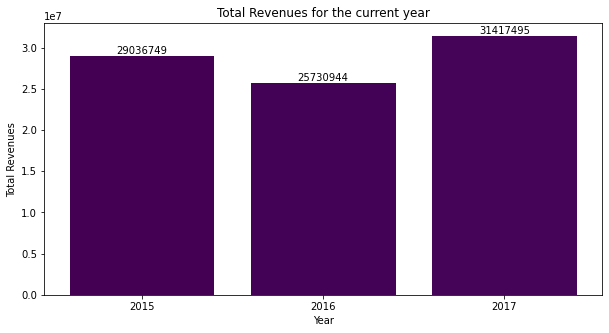

In [13]:
fig,ax = plt.subplots(figsize = (10, 5))
x=['2015','2016','2017']
my_cmap = plt.get_cmap("viridis")
rect0=ax.bar(x,revenue_year['net_revenue'],color=my_cmap.colors)
autolabel(rect0)
plt.xlabel("Year")
plt.ylabel("Total Revenues")
plt.title("Total Revenues for the current year")
plt.show()

### Total customers for the current year

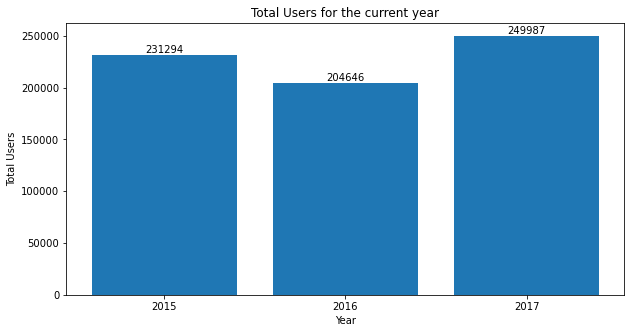

In [33]:
users_number=data.groupby(by='year').agg({'customer_email':'count'})
fig,ax = plt.subplots(figsize = (10, 5))
x=['2015','2016','2017']
rect1=ax.bar(x,users_number['customer_email'])
autolabel(rect1)
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.title("Total Users for the current year")
plt.show()

In [102]:
table_new

,customer_email,2015,2016,2017,year
0,aaafxtkgxo@gmail.com,0.00,127.62,0.00,2016
1,aaagldjgdt@gmail.com,44.72,0.00,0.00,2015
2,aaaglfuvti@gmail.com,0.00,160.79,0.00,2016
3,aaaicvtnzx@gmail.com,49.20,0.00,0.00,2015
4,aaaiekepot@gmail.com,0.00,0.00,43.68,2017
...,...,...,...,...,...
604613,zzzoxtrfic@gmail.com,0.00,0.00,15.74,2017
604614,zzzrjsowtl@gmail.com,95.80,0.00,0.00,2015
604615,zzztwcvgvp@gmail.com,129.75,0.00,0.00,2015
604616,zzzwmlwwmn@gmail.com,0.00,98.01,0.00,2016


## New customers

### New customer numbers

In [16]:
revenues=[]
number=[]
for i in range(2015,2018):
    new=table_new[table_new['year']==i][i]
    r=new.sum().round()
    n=new.count()
    revenues.append(r)
    number.append(n)

In [94]:
number

[231294, 145062, 228262]

<ipython-input-18-6de03a6cfc43>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  rect1=ax.bar(x,y,color=my_colors)


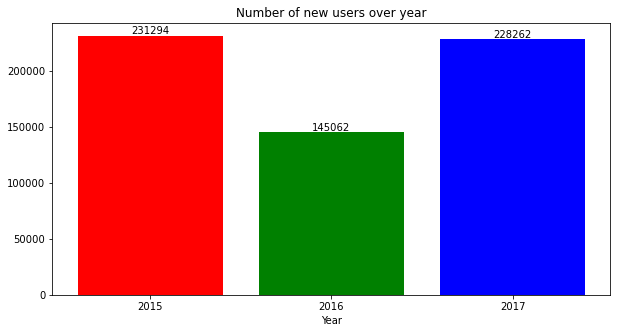

In [18]:
x=['2015','2016','2017']
my_colors = 'rgbkymc' 
y=number
fig, ax= plt.subplots(figsize = (10, 5))
rect1=ax.bar(x,y,color=my_colors)
autolabel(rect1)
plt.xlabel("Year")
plt.title("Number of new users over year")
plt.show()

## New customer revenues

In [93]:
revenues

[29036749.0, 18245491.0, 28676608.0]

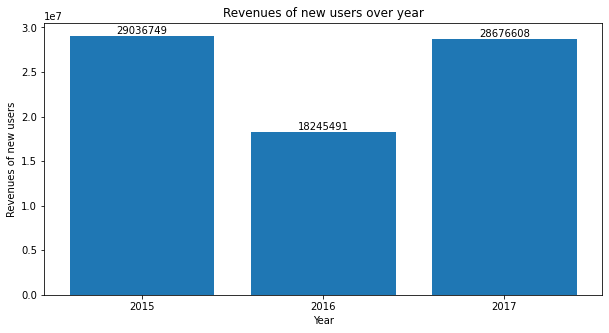

In [21]:
x=['2015','2016','2017']
y=revenues
fig, ax= plt.subplots(figsize = (10, 5))
sns.color_palette()
rect2=ax.bar(x,y)
autolabel(rect2)
plt.xlabel("Year")
plt.ylabel("Revenues of new users")
plt.title("Revenues of new users over year")
plt.show()

In [146]:
revenue_total=revenue_year['net_revenue'].values.tolist()
user_total=users_number['customer_email'].values.tolist()
users_percent=[]
revenue_percent=[]
for i in range(3):
    up=number[i]/user_total[i]*100
    rp=revenues[i]/revenue_total[i]*100
    users_percent.append(up)
    revenue_percent.append(rp)

In [149]:
users_percent

[100.0, 70.8843564008092, 91.30954809650102]

In [150]:
revenue_percent

[100.0, 70.90875095760187, 91.27592126616078]

## Revenues per new customers 

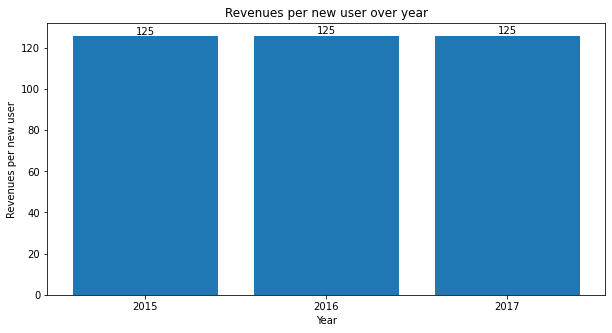

In [22]:
x=['2015','2016','2017']
revenue_per_user=[]
for i in range(0,3):
    r_i=revenues[i]/number[i]
    revenue_per_user.append(r_i)
fig, ax= plt.subplots(figsize = (10, 5))
rect2=ax.bar(x,revenue_per_user)
autolabel(rect2)
plt.xlabel("Year")
plt.ylabel("Revenues per new user")
plt.title("Revenues per new user over year")
plt.show()

It seems that revenues per doesn't change much

## Existing Customer

In [23]:
exist_revenue=[0]

In [24]:
## 2016 Existing customers
Year2016_existing=table_new[(table_new[2016]!=0)&(table_new[2015]!=0)]

In [25]:
exist_revenue.append(Year2016_existing[2015].sum())

In [28]:
## 2017 Existing customers
Year2017=table_new[table_new[2017]!=0]
exist_revenue.append(Year2017[2015].sum()+Year2017[2016].sum())

In [29]:
exist_revenue

[0, 7465117.12, 3489142.3]

In [96]:
users_number['new_users']=number

In [100]:
users_number['existing_number']=users_number['customer_email']-users_number['new_users']

In [107]:
users_number

,customer_email,new_users,existing_number
year,,,
2015,231294,231294,0
2016,204646,145062,59584
2017,249987,228262,21725


In [113]:
existing_u=users_number['existing_number'].values.tolist()
existing_u

[0, 59584, 21725]

In [127]:
year=['2015','2016','2017']
current_r=revenue_year['net_revenue'].values.tolist()
growth=pd.DataFrame([exist_revenue,current_r,existing_u,year])
growth=growth.T

In [128]:
growth

,0,1,2,3
0,0,29036749.0,0,2015
1,7465117.12,25730944.0,59584,2016
2,3489142.3,31417495.0,21725,2017


In [129]:
growth=growth.rename(columns={0:'exist_revenue',1:'current_revenues',2:'existing_u',3:'year'})
growth=growth.set_index('year')

In [130]:
growth['growth']=growth['current_revenues']-growth['exist_revenue']

In [131]:
growth

,exist_revenue,current_revenues,existing_u,growth
year,,,,
2015,0,29036749.0,0,29036749.0
2016,7465117.12,25730944.0,59584,18265826.88
2017,3489142.3,31417495.0,21725,27928352.7


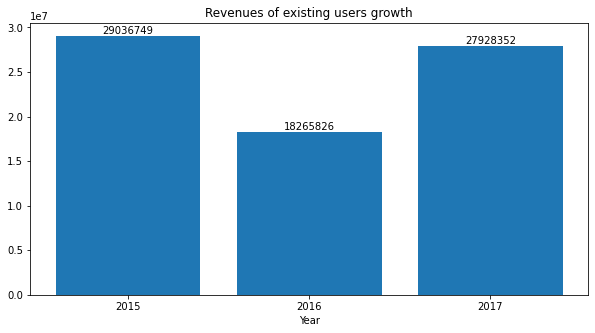

In [45]:
x=['2015','2016','2017']
y=growth_1['growth'].values.tolist()
fig, ax= plt.subplots(figsize = (10, 5))
rect3=ax.bar(x,y)
autolabel(rect3)
plt.xlabel("Year")
plt.title("Revenues of existing users growth")
plt.show()

## Churn data

### Rentention

In [50]:
table_2015=table_new[table_new['year']==2015]
y2015=[table_2015[2015].sum(),table_2015[2016].sum(),table_2015[2017].sum()]
table_2016=table_new[table_new['year']==2016]
y2016=[np.nan,table_2016[2016].sum(),table_2016[2017].sum()]

In [55]:
n2015=[]
n2015.append(tabel_2015['customer_email'][tabel_2015[2015]!=0].count())
n2015.append(tabel_2015['customer_email'][(tabel_2015[2015]!=0)&(tabel_2015[2016]!=0)].count())
n2015.append(tabel_2015['customer_email'][(tabel_2015[2015]!=0)&(tabel_2015[2017]!=0)].count())
n2015

[231294, 59584, 6928]

In [57]:
n2016=[0]
n2016.append(table_2016['customer_email'][table_2016[2016]!=0].count())
n2016.append(table_2016['customer_email'][(table_2016[2016]!=0)&(table_2016[2017]!=0)].count())
n2016

[0, 145062, 14797]

In [58]:
users_churn=pd.DataFrame([n2015,n2016]).T

In [59]:
users_churn=users_churn.rename(columns={0:'2015_n_rentention',1:'2016_n_rentention'})

In [60]:
users_churn['2015_loss_n']=users_churn['2015_n_rentention']-users_churn['2015_n_rentention'].shift(1)

In [61]:
users_churn['2016_loss_n']=users_churn['2016_n_rentention']-users_churn['2016_n_rentention'].shift(1)

In [62]:
users_churn['2016_loss_n']=np.where(users_churn['2016_loss_n']>0,0,users_churn['2016_loss_n'])

In [63]:
users_churn

,2015_n_rentention,2016_n_rentention,2015_loss_n,2016_loss_n
0,231294,0,NaN,NaN
1,59584,145062,-171710.0,0.0
2,6928,14797,-52656.0,-130265.0


In [72]:
## Rentention rate
users_churn['2015_r_rate']=(users_churn['2015_n_rentention']/231294).round(4)
users_churn['2016_r_rate']=(users_churn['2016_n_rentention']/145062).round(4)

In [73]:
## Churn rate
users_churn['2015_l_rate']=(1-users_churn['2015_r_rate']).round(4)
users_churn['2016_l_rate']=np.where((1-users_churn['2016_r_rate'])<1,(1-users_churn['2016_r_rate']).round(4),0)

In [74]:
users_churn.fillna(0)

,2015_n_rentention,2016_n_rentention,2015_loss_n,2016_loss_n,2015_r_rate,2016_r_rate,2015_l_rate,2016_l_rate
0,231294,0,0.0,0.0,1.0000,0.000,0.0000,0.000
1,59584,145062,-171710.0,0.0,0.2576,1.000,0.7424,0.000
2,6928,14797,-52656.0,-130265.0,0.0300,0.102,0.9700,0.898


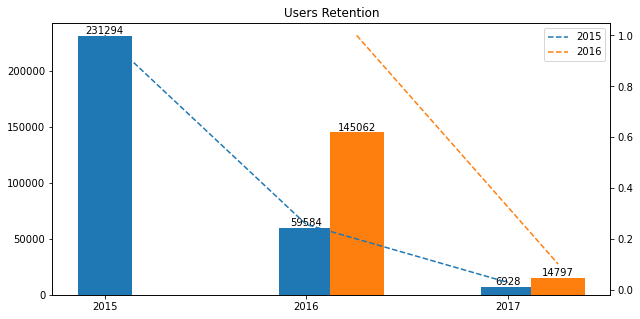

In [75]:
fig, ax= plt.subplots(figsize = (10, 5))
tick_label=['2015','2016','2017']
x1=np.arange(3)
x2=np.arange(1,3)
y1=users_churn['2015_n_rentention'].values
y2=[145062,14797]
y3=users_churn['2015_r_rate'].values
y4=[1.000000,0.102005]
ax2 = ax.twinx()
width=0.8/3
rect5=ax.bar(x,y1,width=width,label='2015')
ax2.plot(x,y3,label='2015',linestyle='--')
rect6=ax.bar(x2+0.25,y2,width=width,label='2016')
ax2.plot(x2+0.25,y4,label='2016',linestyle='--')
autolabel(rect5)
autolabel(rect6)
plt.legend()
plt.xlabel("Year")
plt.title("Users Retention")
plt.show()

## Revenues

In [77]:
revenues_attrition=pd.DataFrame([y2015,y2016])

In [78]:
revenues_attrition=revenues_attrition.T

In [79]:
revenues_attrition['year']=[2015,2016,2017]
revenues_attrition=revenues_attrition.set_index('year')

In [80]:
revenues_attrition=revenues_attrition.rename(columns={0:'2015_r',1:'2016_r'})

In [81]:
revenues_attrition['2015_r_loss']=revenues_attrition['2015_r']-revenues_attrition['2015_r'].shift(1)

In [84]:
revenues_attrition['2016_r_loss']=revenues_attrition['2016_r']-revenues_attrition['2016_r'].shift(1)

In [85]:
revenues_attrition=revenues_attrition.fillna(0)

In [86]:
revenues_attrition['total_loss']=revenues_attrition['2015_r_loss']+revenues_attrition['2016_r_loss']

In [87]:
revenues_attrition=revenues_attrition.fillna(0)

In [88]:
revenues_attrition['2015_p']=revenues_attrition['2015_r']/29036749.19
revenues_attrition['2016_p']=revenues_attrition['2016_r']/18245491.01

In [89]:
revenues_attrition

,2015_r,2016_r,2015_r_loss,2016_r_loss,total_loss,2015_p,2016_p
year,,,,,,,
2015,29036749.19,0.00,0.00,0.00,0.0,1.000000,0.000000
2016,7485452.58,18245491.01,-21551296.61,18245491.01,-3305805.6,0.257792,1.000000
2017,864015.13,1876872.26,-6621437.45,-16368618.75,-22990056.2,0.029756,0.102868


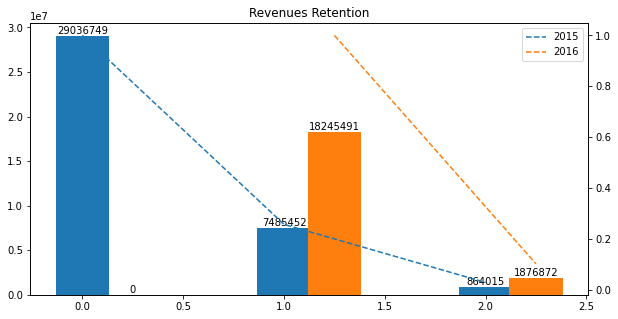

In [91]:
fig, ax= plt.subplots(figsize = (10, 5))
tick_label=['2015','2016','2017']
y1=revenues_attrition['2015_r'].values
y2=revenues_attrition['2016_r'].values
y3=[1,0.257792,0.029756]
y4=[1,0.102868]
x=np.arange(3)
x2=np.arange(1,3)
width=0.8/3
rect7=ax.bar(x,y1,width=width,label='2015')
rect8=ax.bar(x+0.25,y2,width=width,label='2016')
ax2 = ax.twinx()
ax2.plot(x,y3,label='2015',linestyle='--')
ax2.plot(x2+0.25,y4,label='2016',linestyle='--')
autolabel(rect7)
autolabel(rect8)
plt.legend()
plt.xlabel("Year")
plt.title("Revenues Retention")
plt.show()

In [92]:
revenues_attrition[['total_loss']]

,total_loss
year,
2015,0.0
2016,-3305805.6
2017,-22990056.2


## Observations:
- (1) The business went down from 2015 to 2016 and went up from 2016 to 2017
- (2) The rentention rate is so low from year to year(Only 3% users from 2015 rentent to 2017,only 10% users from 2016 to 2017), the customers' life value is short.
- (3) The prices per users haven't change much over time(around 125 for three years). It shows that the price does not appreciate.
- (4) The increasing number of new-users can make up for the loss from old-customers.In 2016, 70% of revenues and users comes from new user while in 2017, more than 90% of revenues and users comes from new user. It shows that the products is getting harder to remain users.
